In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ternary

print('Numpy version:', np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:",ternary.__version__)

Numpy version: 1.18.2
Pandas version: 0.25.3
Matplotlib version: 3.1.3
Ternary version: 1.0.6


## ternary data

### base

In [16]:
enzyme_base = pd.read_csv('Enzyme_base_20201.csv',index_col=0)
osmolyte_base = pd.read_csv('Osmolyte_base_20201.csv',index_col=0)
yield_base = pd.read_csv('Yield_base_20201.csv',index_col=0)

#forcing
force_base    = pd.read_csv('forcing/base_forcing.csv', index_col=0)

In [6]:
enzyme_b   = enzyme_base[yield_base > 0]
osmolyte_b = osmolyte_base[yield_base > 0]
yield_b    = yield_base[yield_base > 0]

In [7]:
enzyme_b.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,NaN,NaN,NaN,NaN,NaN,NaN,1.454897,1.452943,1.474328,1.487898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax3,NaN,NaN,NaN,NaN,NaN,NaN,2.188717,2.202251,2.230959,2.268287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax4,NaN,NaN,NaN,NaN,NaN,0.186228,0.188690,0.189189,0.193120,0.196479,...,NaN,NaN,NaN,NaN,NaN,22.894289,NaN,NaN,NaN,NaN
Tax5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484294,0.485750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### basex4

In [31]:
enzyme_basex4 = pd.read_csv('Enzyme_basex4_20201.csv',index_col=0)
osmolyte_basex4 = pd.read_csv('Osmolyte_basex4_20201.csv',index_col=0)
yield_basex4 = pd.read_csv('Yield_basex4_20201.csv',index_col=0)

In [32]:
enzyme_bx4   = enzyme_basex4[yield_basex4   > 0]
osmolyte_bx4 = osmolyte_basex4[yield_basex4 > 0]
yield_bx4    = yield_basex4[yield_basex4    > 0]

### basex10

In [21]:
enzyme_basex10 = pd.read_csv('Enzyme_basex10_20201.csv',index_col=0)
osmolyte_basex10 = pd.read_csv('Osmolyte_basex10_20201.csv',index_col=0)
yield_basex10 = pd.read_csv('Yield_basex10_20201.csv',index_col=0)

In [33]:
enzyme_bx10   = enzyme_basex10[yield_basex10   > 0]
osmolyte_bx10 = osmolyte_basex10[yield_basex10 > 0]
yield_bx10    = yield_basex10[yield_basex10    > 0]

In [34]:
def community_data(enzyme,osmolyte,Yield):
    """
    Derive community level YAS data.
    
    Parameters:
      -enzyme:
      -osmolyte
      -Yield
    Return:
      -community_alive:
    """
    community = pd.concat([enzyme.sum(axis=0),osmolyte.sum(axis=0),Yield.sum(axis=0)],axis=1,sort=False)
    community.columns = ['Enzyme','Osmolyte', 'Yield']
    total = community.sum(axis=1)
    community_alive = 100*community[total>0].divide(total[total>0],axis=0)
    
    return community_alive

In [35]:
community_base    = community_data(enzyme_b,   osmolyte_b,   yield_b)
community_basex4  = community_data(enzyme_bx4, osmolyte_bx4, yield_bx4)
community_basex10 = community_data(enzyme_bx10,osmolyte_bx10,yield_bx10)

In [50]:
community_base.head(10)

,Enzyme,Osmolyte,Yield
5,84.197130,0.038516,15.764353
6,66.748410,0.030206,33.221384
7,55.148660,0.024905,44.826434
8,44.572619,0.021150,55.406231
9,41.903715,0.019640,58.076645
10,33.855004,0.015851,66.129145
11,32.252433,0.014901,67.732666
12,29.925335,0.013905,70.060760
13,27.901176,0.013041,72.085783
14,23.764975,0.010724,76.224300


In [49]:
community_base.loc[str(365*2+1),:]

KeyError: '731'

In [37]:
community_basex4.head()

,Enzyme,Osmolyte,Yield
5,84.197130,0.038516,15.764353
6,66.748410,0.030206,33.221384
7,55.148660,0.024905,44.826434
8,44.572619,0.021150,55.406231
9,41.903715,0.019640,58.076645


In [38]:
community_basex10.head()

,Enzyme,Osmolyte,Yield
5,84.197130,0.038516,15.764353
6,66.748410,0.030206,33.221384
7,55.148660,0.024905,44.826434
8,44.572619,0.021150,55.406231
9,41.903715,0.019640,58.076645


In [41]:
community_basex10.shape

(3148, 3)

In [47]:
community_basex10.loc[['5','6'],:]

,Enzyme,Osmolyte,Yield
5,84.19713,0.038516,15.764353
6,66.74841,0.030206,33.221384


## year-3

`version_1`

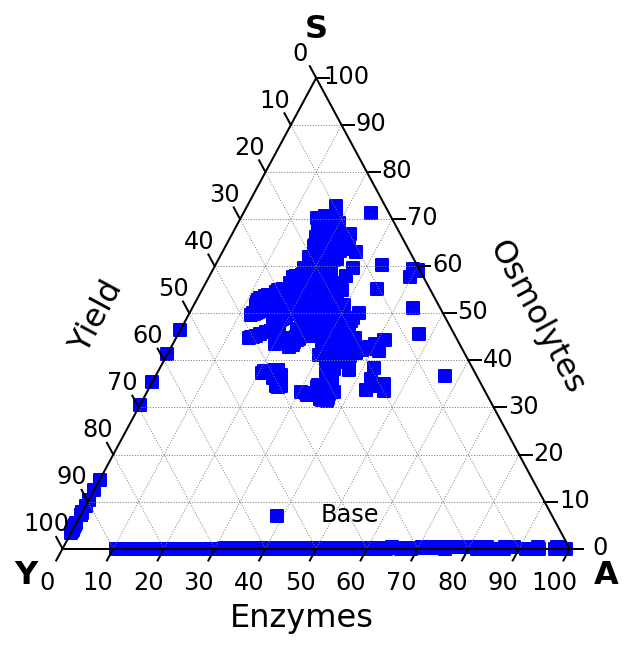

In [48]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

#tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='dodgerblue',label="Pre-DS",         alpha=1.0)
#tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='dodgerblue',label="Post-DS",        alpha=1.0)

tax.scatter(community_base.values, marker='s',color='blue',   label="Base",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

`version_2`

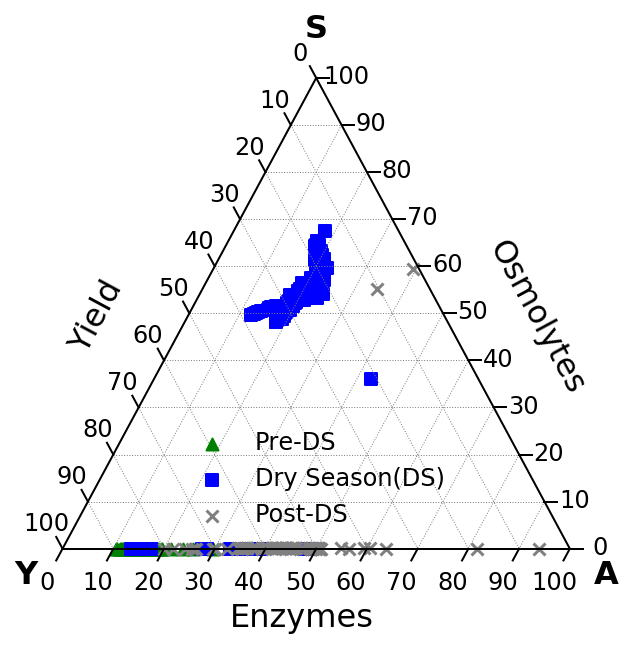

In [15]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

#tax.scatter(community_base.iloc[365*3-365:365*3-0,:].values,   marker='s',color='blue',   label="Base",alpha=1.0)
tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='green',label="Pre-DS", alpha=1.0)
tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)


#tax.scatter(community_basex4.iloc[365*3-365:365*3-0,:].values, marker='s',color='orange', label="Base",alpha=1.0)
#tax.scatter(community_basex10.iloc[365*3-365:365*3-0,:].values,marker='s',color='red',    label="Base",alpha=0.5)

tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('scatter_ternary.pdf')
tax.show()

`version_3`

In [11]:
basex4  = pd.read_csv('forcing/basex4_forcing.csv', index_col=0)
basex10 = pd.read_csv('forcing/basex10_forcing.csv', index_col=0)

base.head()

,Temp,FM,Psi,Date
0,10.823177,51.092615,-0.699744,2010-12-15
1,11.276333,59.277813,-0.590705,2010-12-16
2,9.696135,65.896792,-0.523555,2010-12-17
3,12.626583,69.708313,-0.491047,2010-12-18
4,12.442771,70.763521,-0.482708,2010-12-19


In [12]:
community_base.head()

,Enzyme,Osmolyte,Yield
1,99.954277,0.045723,0.000000
2,99.954088,0.045912,0.000000
3,99.954009,0.045991,0.000000
4,99.954037,0.045963,0.000000
5,95.487398,0.043855,4.468748


In [13]:
def generate_heatmap_data(community,water_potential):
    
    
    community_t = community.copy()
    community_t['Psi'] = water_potential.loc[:,'Psi'].tolist()
    
    d = dict()
    for (i, j, y, p) in community_t.values:
        d[(i, j)] = p
    return d

In [21]:
def generate_heatmap_data(community,water_potential):
    
    
    community_t = community.copy()
    community_t['Psi'] = abs(water_potential.loc[:,'Psi']).tolist()
    
    d = dict()
    for (i, j, y, p) in community_t.values:
        d[(i, j)] = p
    return d

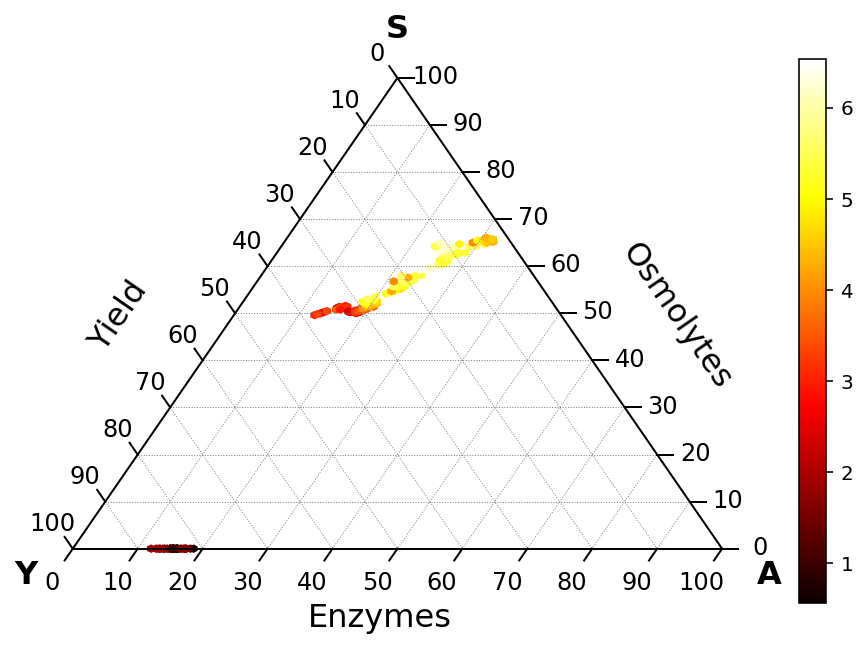

In [22]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,5)

#tax.scatter(community_base.iloc[365*3-365:365*3-0,:].values,   marker='s',color='blue',   label="Base",alpha=1.0)
#tax.scatter(community_base.iloc[365*3-365:365*3-257,:].values,marker='^',color='green',label="Pre-DS", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-257:365*3-75,:].values, marker='s',color='blue',      label="Dry Season(DS)", alpha=1.0)
#tax.scatter(community_base.iloc[365*3-75:365*3-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)

tax.heatmap(generate_heatmap_data(community_base.iloc[365*3-257:365*3-75,:], base.iloc[365*3-257:365*3-75,:]), style="hexagonal", cmap='hot',colorbar=True)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('scatter_ternary.pdf')
tax.show()

## year-6

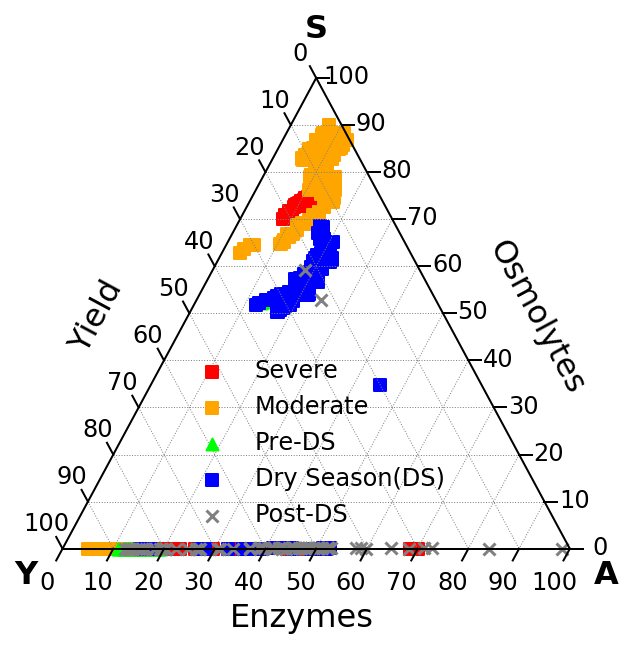

In [39]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


tax.scatter(community_basex10.iloc[365*6-257:365*6-75,:].values,marker='s',color='red',    label="Severe",alpha=1.0)

tax.scatter(community_basex4.iloc[365*6-257:365*6-75,:].values, marker='s',color='orange', label="Moderate",alpha=1.0)

tax.scatter(community_base.iloc[365*6-365:365*6-257,:].values,  marker='^',color='lime',label="Pre-DS", alpha=1.0)
tax.scatter(community_base.iloc[365*6-257:365*6-75,:].values, marker='s',color='blue',      label="Dry Season(DS)",alpha=1.0)
tax.scatter(community_base.iloc[365*6-75:365*6-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)

tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y6.pdf',dpi=500)

tax.show()

In [17]:
community_base_t = community_base.iloc[365*6-257:365*6-75,:].copy()
community_base_t['Psi'] = abs(base.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_basex4_t = community_basex4.iloc[365*6-257:365*6-75,:].copy()
community_basex4_t['Psi'] = abs(basex4.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_basex10_t = community_basex10.iloc[365*6-257:365*6-75,:].copy()
community_basex10_t['Psi'] = abs(basex10.iloc[365*6-257:365*6-75,:].loc[:,'Psi']).tolist()

community_year6 = np.concatenate([community_base_t.values, community_basex4_t.values, community_basex10_t.values])

community_y6 = dict()
for (i, j, y, p) in community_year6:
    community_y6[(i, j)] = p

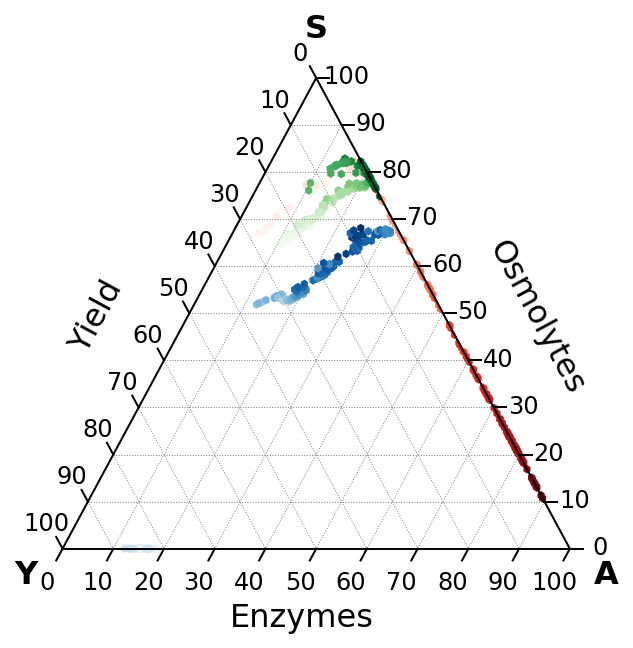

In [52]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


#tax.scatter(community_basex10.iloc[365*6-257:365*6-75,:].values,marker='s',color='red',    label="Severe",alpha=1.0)
tax.heatmap(generate_heatmap_data(community_basex10.iloc[365*6-257:365*6-75,:], basex10.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='Reds',colorbar=False)

#tax.scatter(community_basex4.iloc[365*6-257:365*6-75,:].values, marker='s',color='orange', label="Moderate",alpha=1.0)
tax.heatmap(generate_heatmap_data(community_basex4.iloc[365*6-257:365*6-75,:], basex4.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='Greens',colorbar=False)

#tax.scatter(community_base.iloc[365*6-365:365*6-257,:].values,  marker='^',color='lime',label="Pre-DS", alpha=1.0)
#tax.scatter(community_base.iloc[365*6-257:365*6-75,:].values, marker='s',color='blue',      label="Dry Season(DS)",alpha=1.0)
#tax.scatter(community_base.iloc[365*6-75:365*6-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)
tax.heatmap(generate_heatmap_data(community_base.iloc[365*6-257:365*6-75,:], base.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='Blues',colorbar=False)


#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y6.pdf',dpi=500)

tax.show()

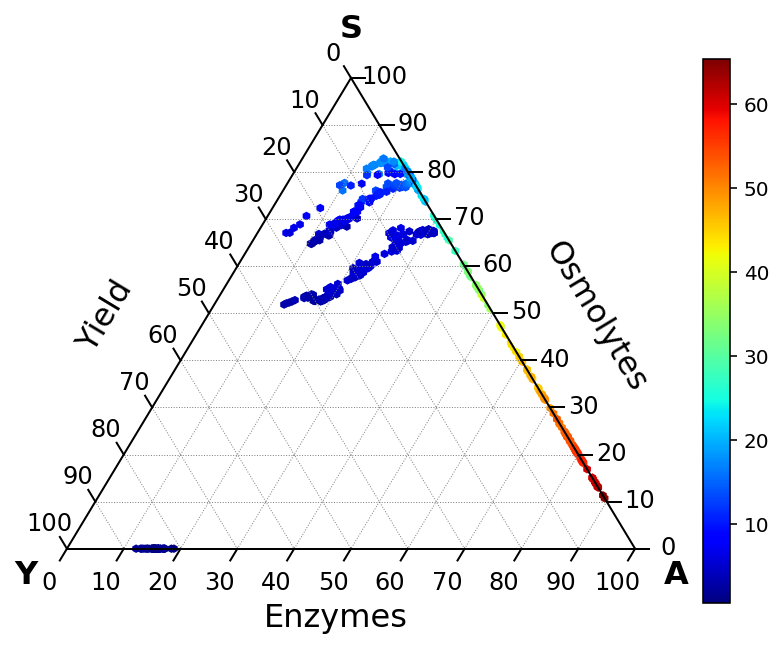

In [51]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(7,5)


#tax.scatter(community_basex10.iloc[365*6-257:365*6-75,:].values,marker='s',color='red',    label="Severe",alpha=1.0)
#tax.heatmap(generate_heatmap_data(community_basex10.iloc[365*6-257:365*6-75,:], basex10.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='bwr',colorbar=False)

#tax.scatter(community_basex4.iloc[365*6-257:365*6-75,:].values, marker='s',color='orange', label="Moderate",alpha=1.0)
#tax.heatmap(generate_heatmap_data(community_basex4.iloc[365*6-257:365*6-75,:], basex4.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='Blues',colorbar=False)

#tax.scatter(community_base.iloc[365*6-365:365*6-257,:].values,  marker='^',color='lime',label="Pre-DS", alpha=1.0)
#tax.scatter(community_base.iloc[365*6-257:365*6-75,:].values, marker='s',color='blue',      label="Dry Season(DS)",alpha=1.0)
#tax.scatter(community_base.iloc[365*6-75:365*6-0,:].values,   marker='x',color='grey',label="Post-DS",alpha=1.0)
#tax.heatmap(generate_heatmap_data(community_base.iloc[365*6-257:365*6-75,:], base.iloc[365*6-257:365*6-75,:]),style="hexagonal", cmap='Greys',colorbar=True)

tax.heatmap(community_y6, style="hexagonal", cmap='jet',colorbar=True)


#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y6.pdf',dpi=500)

tax.show()

## year-9

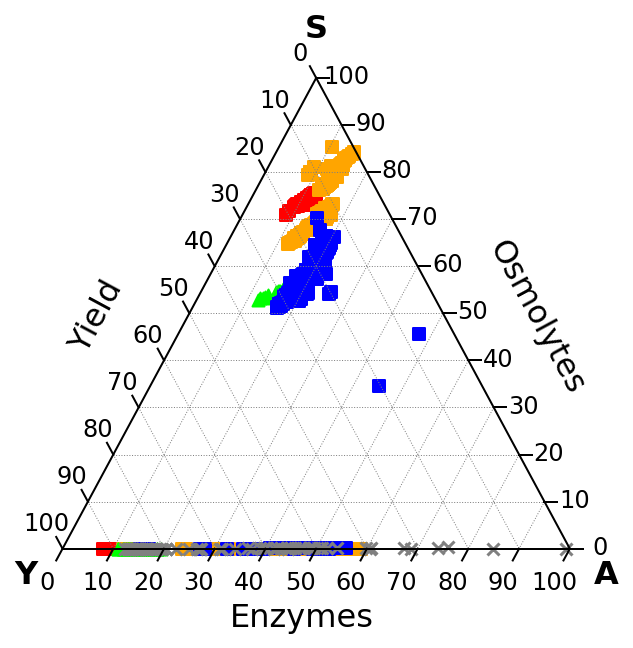

In [40]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)


tax.scatter(community_basex10.iloc[365*9-257:365*9-75,:].values,marker='s',color='red',       label="Severe",  alpha=1.0)
tax.scatter(community_basex4.iloc[365*9-257:365*9-75,:].values, marker='s',color='orange',    label="Moderate",alpha=1.0)
tax.scatter(community_base.iloc[365*9-365:365*9-257,:].values,  marker='^',color='lime',label="Pre-DS",  alpha=1.0)
tax.scatter(community_base.iloc[365*9-257:365*9-75,:].values,   marker='s',color='blue',      label="Dry Season(DS)",alpha=1.0)
tax.scatter(community_base.iloc[365*9-75:365*9-0,:].values,     marker='x',color='grey',label="Post-DS",  alpha=1.0)

#tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)

tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Yield",     fontsize=fontsize, weight='normal', offset=0.18)
tax.right_axis_label("Osmolytes",fontsize=fontsize, weight='normal', offset=0.18)
tax.bottom_axis_label("Enzymes", fontsize=fontsize, weight='normal', offset=0.10)
tax.right_corner_label("A",fontsize=fontsize,weight='heavy')
tax.top_corner_label("S",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("Y", fontsize=fontsize,weight='heavy')

#tax.savefig('../figures/ternary_y9.pdf',dpi=500)

tax.show()